In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Tuple, Optional

In [2]:
import fork_simulation as F

Fork mass: 0.20 kg
Fork cost: £9.89
Natural frequency (1st mode): 84.30 Hz


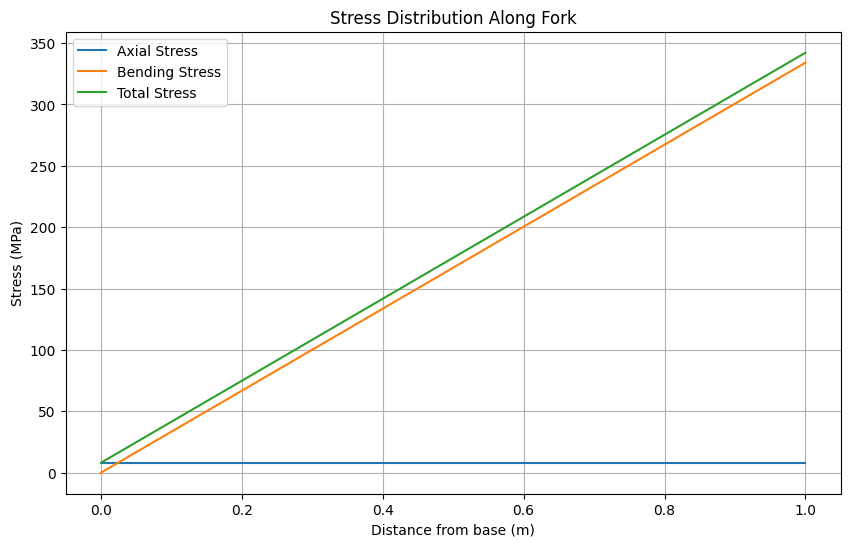

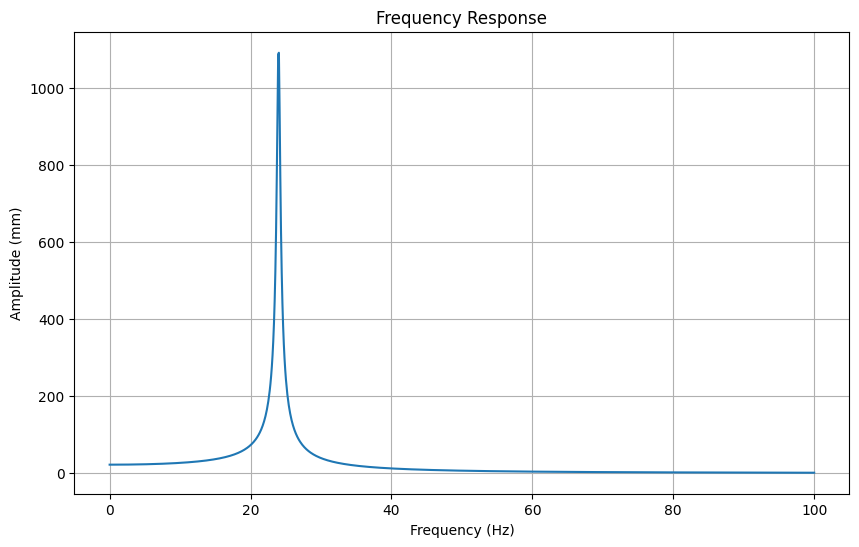

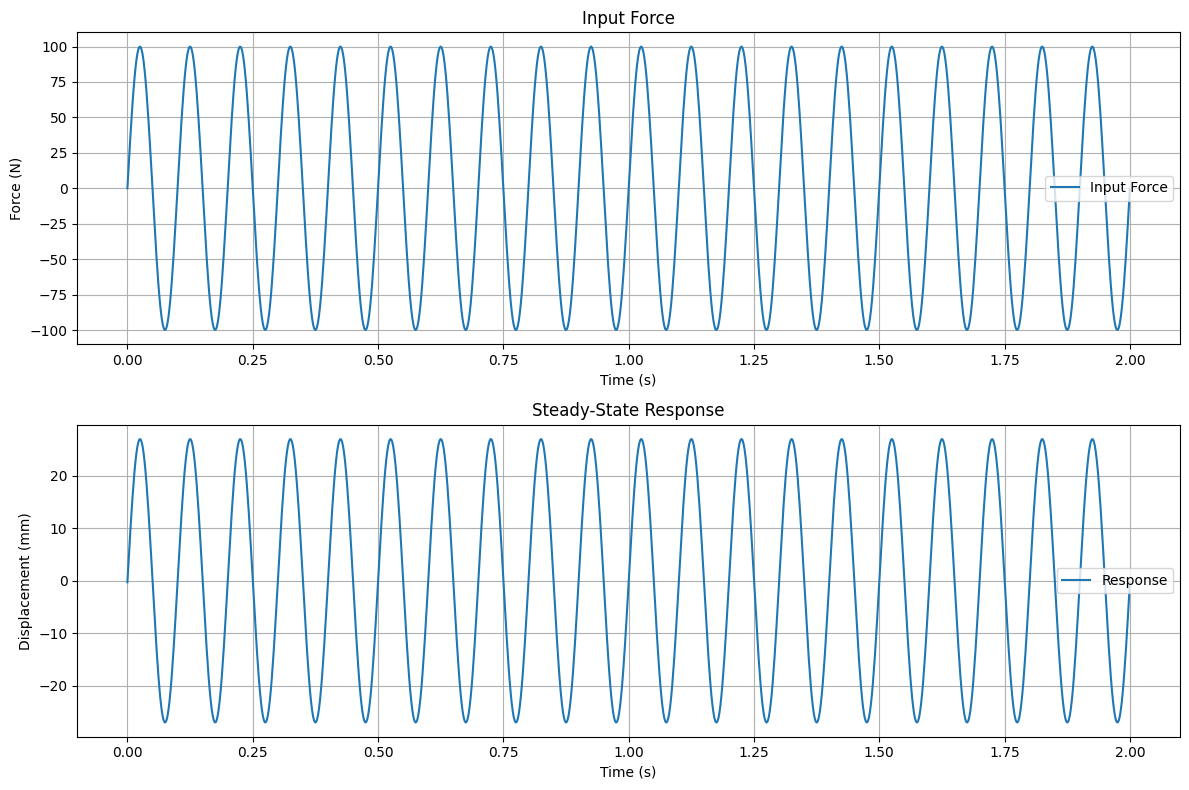

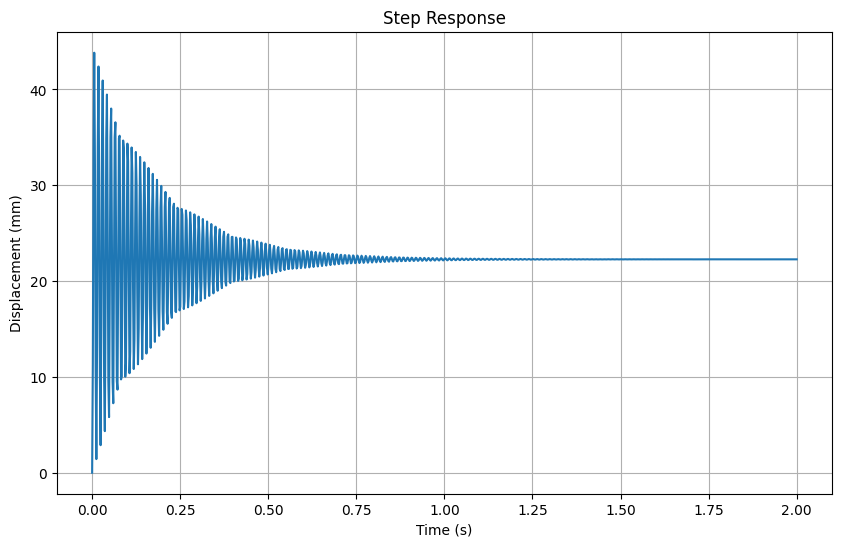

In [3]:
# Example material properties (Carbon Fiber)
material = F.MaterialProperties(
    E_axial=120,  # GPa
    E_transverse=8,  # GPa
    G=4.5,  # GPa
    nu=0.3,
    rho=1600,  # kg/m³
    cost_per_kg=50,  # £/kg
    damping_ratio=0.01
)

# Example geometry
geometry = F.ForkGeometry(
    length=1,  # m
    outer_diameter=0.05,  # m
    wall_thickness=0.0008  # m
)

# Create simulation
fork = F.ForkSimulation(material, geometry)

# Print basic properties
print(f"Fork mass: {fork.mass:.2f} kg")
print(f"Fork cost: £{fork.cost:.2f}")
print(f"Natural frequency (1st mode): {fork.natural_frequency():.2f} Hz")

# Example analysis
fork.plot_stress_distribution(axial_force=1000, transverse_force=500)  # 1000N axial, 500N transverse
fork.plot_frequency_response(force_amplitude=100, frequency_range=(0, 100))  # 100N force, 0-100Hz range 

# Time domain analysis
fork.plot_steady_state_vibration(force_amplitude=100, frequency=10)  # 100N at 10Hz
fork.plot_step_response(force_amplitude=100)  # 100N step force 